In [23]:
import pandas as pd
import inflection as ifn
from IPython.display import display
from IPython.display import Image
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import datetime


#### !Carga dos dados etapa anterior

In [2]:
data = pd.read_csv('Data/predictionStore.csv', parse_dates=['date'])
num_atrib = pd.read_csv('Data/num_atrib.csv')
cat_atrib = pd.read_csv('Data/cat_atrib.csv')


/tmp/ipykernel_28771/1126972905.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/predictionStore.csv', parse_dates=['date'])


In [6]:
df = data.copy()

### 2. Feature Engineering

####    2.1. Mapa mental de Hipóteses

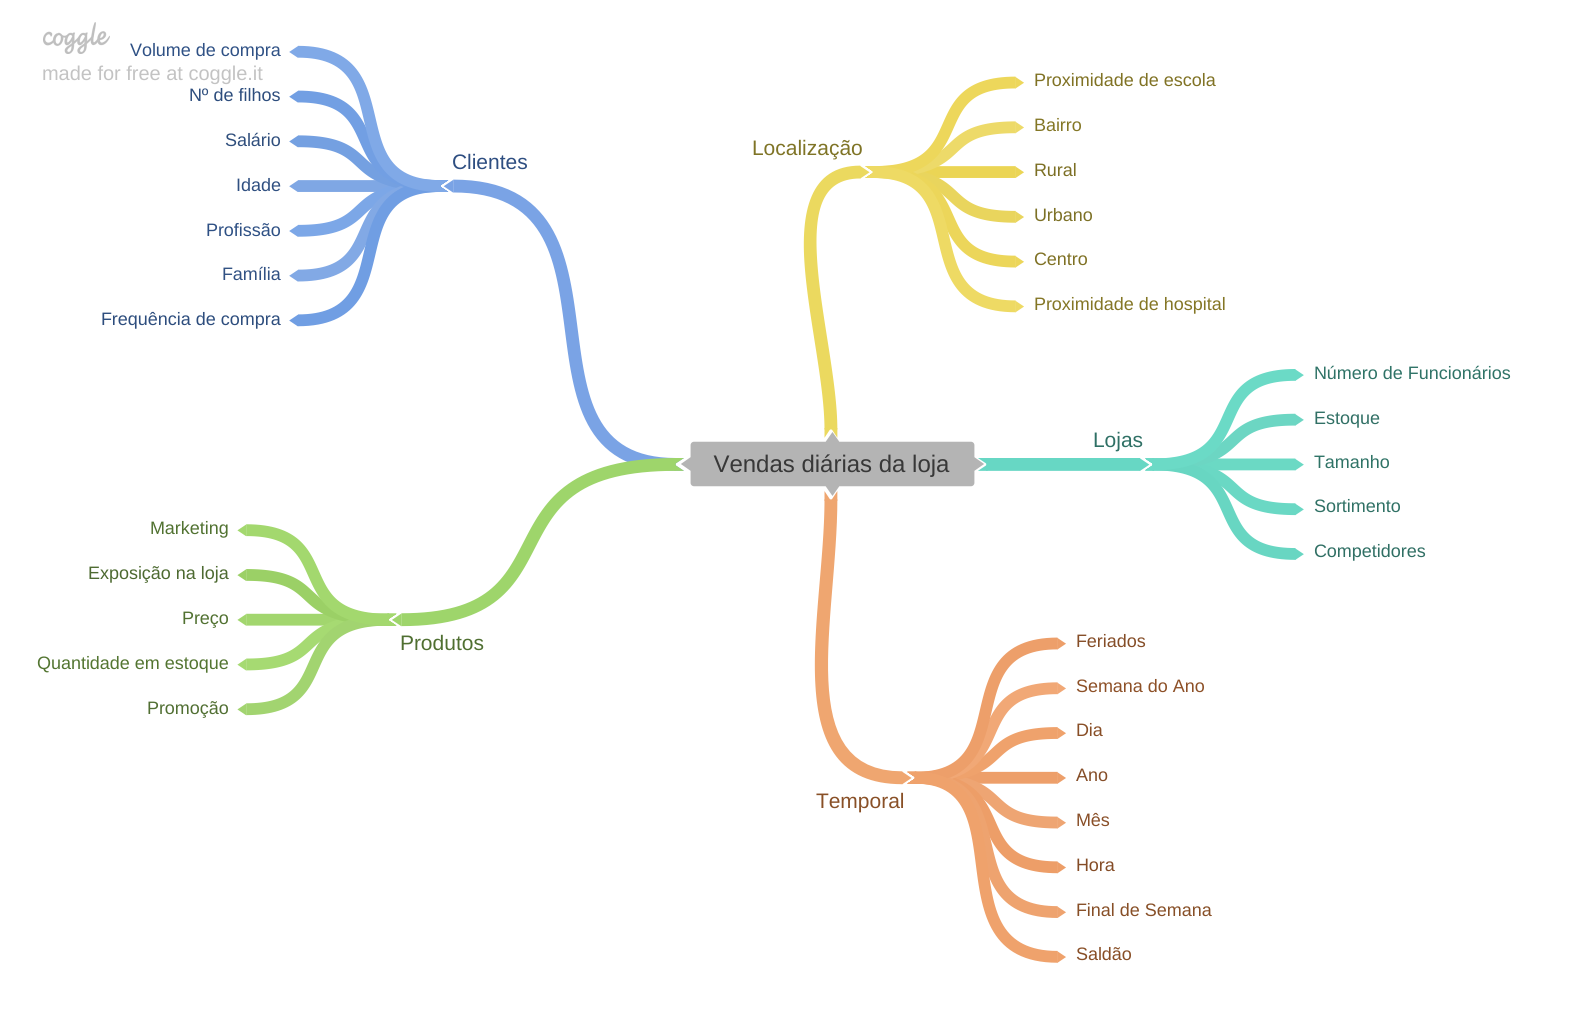

In [13]:
Image('img/Vendas_dirias_da_loja.png', height=800)

#####    2.1.1 Hipóteses Loja

    1. Lojas com maior quadro de funcionários deveriam vender mais.
    
    2. Lojas com maior estoque deveriam vender mais.

    3. Lojas com maior porte deveriam vender mais.

    4. Lojas com maior sortimento deveriam vender mais.
    
    5. Lojas com competidores mais próximos deveriam vender menos.

    6. Lojas com competidores a mais tempo deveriam vender menos.

#####    2.1.2 Hipóteses Produto

    1. Lojas que investem mais em marketing deveriam vender mais.

    2. Lojas que expões mais os produtos nas vitrines deveriam vender mais.

    4. Lojas que tem menor preço deveriam vender mais.
    
    5. Lojas com promoções mais agressivas deveriam vender mais.

    6. Lojas com promoções ativas por mais tempo deveriam vender mais.

    7. Lojas com mais dias de promoção deveriam vender mais.

    8. Lojas com mais promoções deveriam vender mais.

#####    2.1.3 Hipóteses Tempo

    1. Lojas que abrem durante o feriado de natal deveriam vender mais.

    2. Lojas deveriam vender mais ao longo dos anos.
    
    3. Lojas deveriam vender mais no segundo semestre do ano.

    4. Lojas deveriam vender mais após o dia 10 de cada mês.

    5. Lojas deveriam vender menos aos fins de semana.

    6. Lojas deveriam vender menos durante o feriados escolares.

####    2.1. Lista final de hipóteses (por prioridades)

    |Loja| 
    1. Lojas com maior sortimento deveriam vender mais.

    2. Lojas com competidores mais próximos deveriam vender menos.

    3. Lojas com competidores a mais tempo deveriam vender menos.

    |Produto|
    4. Lojas com promoções ativas por mais tempo deveriam vender mais.
    
    5. Lojas com mais dias de promoção deveriam vender mais.
    
    6. Lojas com mais promoções deveriam vender mais.

    |Tempo|
    7. Lojas que abrem durante o feriado de natal deveriam vender mais.

    8. Lojas deveriam vender mais ao longo dos anos.
    
    9. Lojas deveriam vender mais no segundo semestre do ano.

    10. Lojas deveriam vender mais após o dia 10 de cada mês.

    11. Lojas deveriam vender menos aos fins de semana.

    12. Lojas deveriam vender menos durante o feriados escolares.




####    2.2. Feature Engineering

In [20]:
# Extraindo o ano
df['year'] = df.date.dt.year

# Extraindo o mês
df['month'] = df.date.dt.month

# Extraindo o dia
df['day'] = df.date.dt.day

# Extraindo o semana do ano
df['weekofyear'] = df.date.dt.isocalendar().week

# Extraindo o semana e ano
df['year_week'] = df.date.dt.strftime('%Y-%W')

In [ ]:
# Competição desde 
df['competition_since'] =  df[['competition_open_since_month', 'competition_open_since_year']].apply(lambda x : datetime.datetime(year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1), axis=1)
df['competition_time_month'] = ( (df['date'] - df['competition_since']) / 30 ).apply(lambda x : x.days).astype(int)

# Promoção desde 
df['promo_since'] = df['promo2_since_year'].astype(str) + '-' + df['promo2_since_week'].astype(str)
df['promo_since'] = df['promo_since'].apply(lambda x : datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df['promo_time_week'] = ( (df['date'] - df['promo_since'] ) / 7 ).apply(lambda x : x.days).astype(int)

In [26]:
# assortment
df['assortment'] = df['assortment'].apply(lambda x : 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' if x == 'c' else 'invalid')

# state_holiday
df['state_holiday'] = df['state_holiday'].apply(lambda x : 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


In [30]:
df.to_csv('Data/predictionStoreP03.csv', index=False)